Figure 3 in Mahdavi & Siegel (2021) Indoor Air

This figure illustrates the mass of dust collected on HVAC filters in ASHRAE RP-1649 project per filtration volume of the air passing through the filters.

Plot type: Scatter plot

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.container as container
import matplotlib.ticker as mtick
import numpy as np
exec(open(r'C:\PhD Research\Generic Codes\notion_corrections.py').read())

In [2]:
### Reading from the main dataframe (pm_master) and defining the x and y axes values

df = pd.read_excel(backslash_correct(r'C:\PhD Research\PhD - PSD TSP\Processed\pm_master.xlsx'))

x1 = df.loc[df['ft'] == 1, 'filtration volume']
x2 = df.loc[df['ft'] == 2, 'filtration volume']
x3 = df.loc[df['ft'] == 3, 'filtration volume']
x4 = df.loc[df['ft'] == 4, 'filtration volume']

x1_err = df.loc[df['ft'] == 1, 'filtration volume error']
x2_err = df.loc[df['ft'] == 2, 'filtration volume error']
x3_err = df.loc[df['ft'] == 3, 'filtration volume error']
x4_err = df.loc[df['ft'] == 4, 'filtration volume error']


y1 = df.loc[df['ft'] == 1, 'TSP mass']
y2 = df.loc[df['ft'] == 2, 'TSP mass']
y3 = df.loc[df['ft'] == 3, 'TSP mass']
y4 = df.loc[df['ft'] == 4, 'TSP mass']

y1_err = df.loc[df['ft'] == 1, 'TSP mass error']
y2_err = df.loc[df['ft'] == 2, 'TSP mass error']
y3_err = df.loc[df['ft'] == 3, 'TSP mass error']
y4_err = df.loc[df['ft'] == 4, 'TSP mass error']

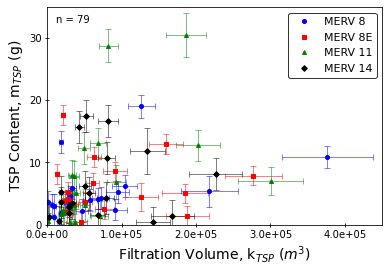

In [3]:
plt.figure()

plt.errorbar(x1, y1, yerr = [y1_err,y1_err], xerr = [x1_err,x1_err], 
             capsize = 3, c = "b", ecolor = 'b', lw = 0, elinewidth = 0.5, capthick = 0.5, label = 'MERV 8', marker = 'o', ms = 4)

plt.errorbar(x2, y2, yerr = [y2_err,y2_err], xerr = [x2_err,x2_err], 
             capsize = 3, c = "r", ecolor = 'r', lw = 0, elinewidth = 0.5, capthick = 0.5, label = 'MERV 8E', marker = 's', ms = 4)

plt.errorbar(x3, y3, yerr = [y3_err,y3_err], xerr = [x3_err,x3_err], 
             capsize = 3, c = "g", ecolor = 'g', lw = 0, elinewidth = 0.5, capthick = 0.5, label = 'MERV 11', marker = '^', ms = 4)

plt.errorbar(x4, y4, yerr = [y4_err,y4_err], xerr = [x4_err,x4_err], 
             capsize = 3, c = "k", ecolor = 'k', lw = 0, elinewidth = 0.5, capthick = 0.5, label = 'MERV 14', marker = 'D', ms = 4)

plt.xlim(0, 450000)
plt.xticks(np.arange(0, 450000, step=100000))
ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
plt.minorticks_off()
plt.xlabel(r'Filtration Volume, k$_{TSP}$ ($m^{3}$)', size = 14) # FIX THIS

plt.ylim(0, 35)
plt.yticks(np.arange(0, 35, step=10))
plt.ylabel('TSP Content, m$_{TSP}$ (g)', size = 14)

plt.tick_params(axis = 'both', direction = 'inout')
# plt.ticklabel_format(style='sci', axis='both')

## The below system doesn't work in loop as it cumulatvely add labels. Should later find a solution for it.
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
new_handles = []
for h in handles:
    #only need to edit the errorbar legend entries
    if isinstance(h, container.ErrorbarContainer):
        new_handles.append(h[0])
    else:
        new_handles.append(h)
ax.legend(new_handles, labels, loc = 1, frameon = True, edgecolor = 'black', fontsize = 11)


# plt.legend(loc = 1, frameon = True, edgecolor = 'black', framealpha=1)
plt.text(35000, 33, 'n = 79', ha = 'center', va = 'center', fontsize = 10)

plt.savefig(r'C:/PhD Research/PhD - PSD TSP/Processed/plots/Figure_3.jpg', format='jpg', dpi=1600, bbox_inches='tight')


End of Code